In [1]:
from  yoav_experiment_embedding_mnist import *
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls -lrth  Results_yoav/

total 231984
-rw-r--r--  1 yoavfreund  staff   201K Sep 24 18:12 100Landmarks5000Points.pkl
-rw-r--r--  1 yoavfreund  staff   7.8M Sep 24 20:11 20Landmarks5000Points.pkl
-rw-r--r--  1 yoavfreund  staff   4.8M Sep 25 18:32 20LandmarksallDigit4.pkl
-rw-r--r--  1 yoavfreund  staff   4.8M Sep 25 18:41 100LandmarksallDigit4.pkl
-rw-r--r--  1 yoavfreund  staff    80M Sep 26 09:53 2000LandmarksallDigit4.pkl


In [3]:
import pickle as pk
with open('Results_yoav/2000LandmarksallDigit4.pkl','rb') as pkl_file:
    (V,lm_indices,source_indices,labels,MN)=pk.load(pkl_file)
MN.mnistdata.shape,V.shape

((5842, 784), (1000, 5843))

In [4]:
def calc_ER(V1,s1,V2,s2):
    selfV1=np.mean(V1[s1])
    selfV2=np.mean(V2[s2])
    cross12=np.mean(V1[s2])
    cross21=np.mean(V2[s1])
    dist=selfV1+selfV2-cross12-cross21
    return dist,selfV1,selfV2,cross12,cross21

### Are small distances symmtric.

I would like to know whether one can estimate the ER by considering one half of it:

Is `selfV1-cross12`  close to `selfV2-cross21`

In [5]:
D={}  #distances from each landmark.
selfV=[]
for i1 in range(len(source_indices)):
    V1=V[i1,:]
    s1=source_indices[i1]
    dist,selfV1,selfV2,cross12,cross21 = calc_ER(V1,s1,V1,s1)
    #print('i1=%3d,selfV1=%5.4f'%(i1,selfV1))
    selfV.append(selfV1)
selfV=array(selfV)

(0.0, 500.0)

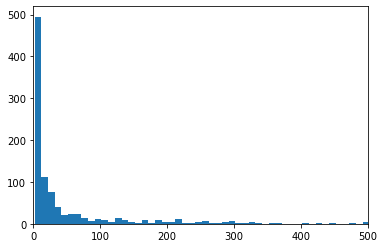

In [6]:
hist(selfV,bins=1000);
xlim([0,500])

In [7]:
selfV.shape, len(lm_indices)

((1000,), 1000)

In [29]:
outliers,=nonzero(selfV>500)
outliers=lm_indices[outliers]
inliers,=nonzero(selfV<3)
inliers=lm_indices[inliers]
len(inliers),len(outliers)

(157, 41)

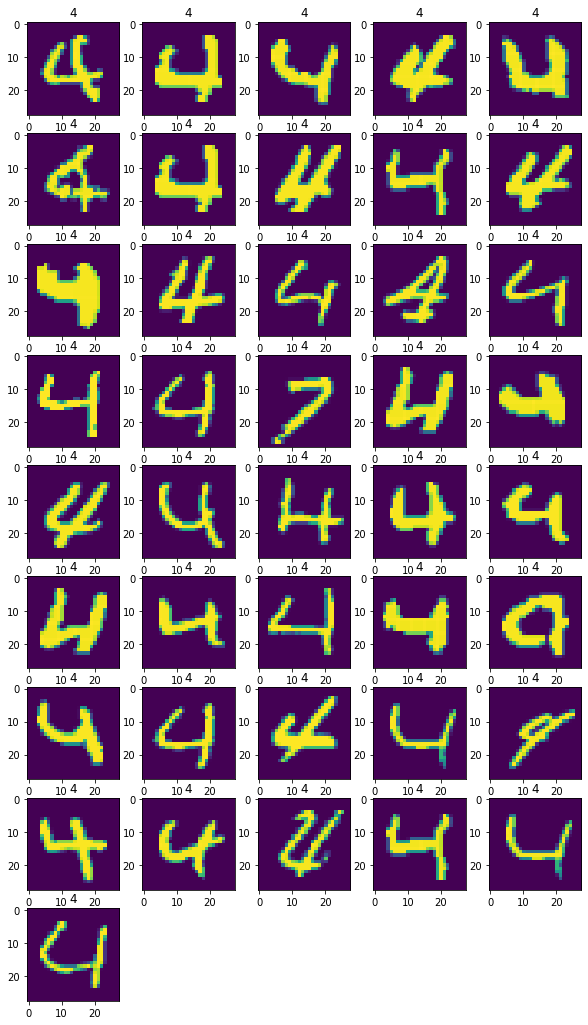

In [30]:
MN.plot_landmark(outliers)

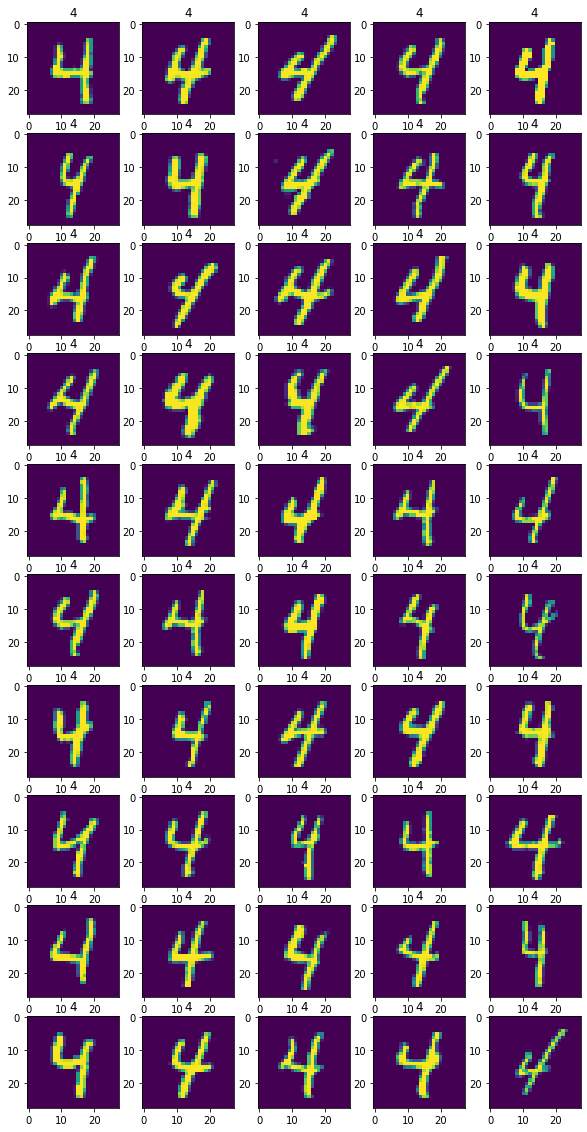

In [31]:
MN.plot_landmark(inliers[:50])

#### remove outliers

In [11]:
V=V[selfV<100,:]

In [12]:
V.shape, selfV.shape

((823, 5843), (1000,))

In [13]:
from sys import exit

In [14]:
#dists=[[[] for i in range(10)] for j in range(10)]
D=[]  #distances from each landmark.
for i1 in range(V.shape[0]):
    D1=[]
    for i2 in range(V.shape[0]):
        V1=V[i1,:]
        V2=V[i2,:]
        s1=source_indices[i1]
        s2=source_indices[i2]
        dist,selfV1,selfV2,cross12,cross21 = calc_ER(V1,s1,V2,s2)
        if selfV1 < cross12:
            print(i1,i2,f'selfV1={selfV1} < cross12={cross12}')
            exit()
        D1.append(dist)
        #print('i1=%3d,i2=%3d,selfV1=%5.2f, cross12=%5.2f, selfV2=%5.2f, cross21=%5.2f dist=%5.2f'%(i1,i2,selfV1,cross12,selfV2,cross21,dist))
    D.append(array(D1))

0 487 selfV1=4.797347708771469 < cross12=4.79734770877147


SystemExit: 

/Users/yoavfreund/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3405: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [16]:
s1,s2

([1696, 4928, 5571, 1032, 5000, 939, 2801, 3859, 3575, 2616, 1818, 3547, 1437],
 [1696, 3859, 5000])

(-1.0, 1.0)

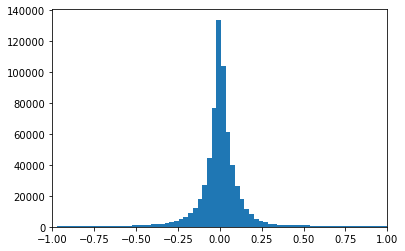

In [36]:
hist(D.flatten(),bins=10000);
xlim([-1,1])

In [14]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


#### Create a hierarchy of epsilon Covers

In [15]:
from random import choice

In [25]:
len(D)

823

In [26]:
epsilon=100

covers={}
cover=[choice(range(len(D)))]

while epsilon>0.00001:
    while True:
        added=False
        for i in range(len(D)):
            if i in cover:
                continue
            D_to_cover=[D[i][j] for j in cover]
            min_d=min(D_to_cover)
            print(epsilon,i,min_d)
            if min_d>epsilon:
                cover.append(i)
                #print(i,min_d,cover)
                added=True
        if not added:
            covers[epsilon]=copy(cover)
            break
    print(epsilon,len(cover))
    epsilon=epsilon/2

100 0 3.0593922400997826
100 1 0.2135120468193381
100 2 88.0084640264066
100 3 93.99153113643307
100 4 8.068667554530371
100 5 -0.0027626357004664204
100 6 -0.04378387092882008
100 7 -0.22718384165664385
100 8 -0.07033758109727661
100 9 -0.051710078949062765
100 10 -0.16109132848300844
100 11 -0.020277327761885733
100 12 0.041951515987371124
100 13 0.011479718012270546
100 14 -0.17816208041704296
100 15 0.04849223123429347
100 16 -0.06017288315054614
100 17 0.0032776469604050007
100 18 0.01907364481605378
100 19 -0.02131061417056279
100 20 -0.15140635722944729
100 21 -0.012503735035727326
100 22 -0.0050665662982585236
100 23 -0.07617059413013427
100 24 -0.045838687699398806
100 25 -0.08212614271932317
100 26 -0.11111320126931568
100 27 -0.010013406190856777
100 28 -0.04787020129552011
100 29 0.0036972343309142897
100 30 0.014667468725822141
100 31 -0.05959084267557757
100 32 0.00046367754103338044
100 33 -0.03379167385779236
100 34 0.07492740210941107
100 35 0.02335345642769937
100 36 

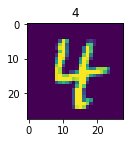

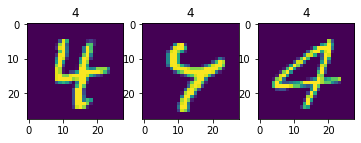

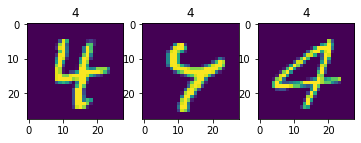

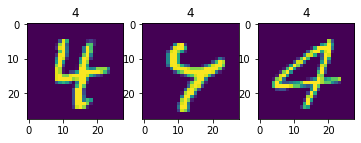

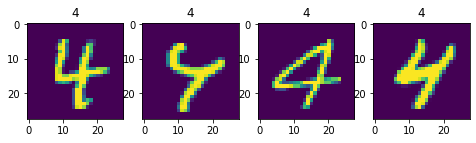

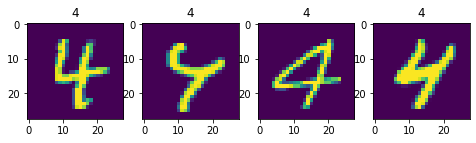

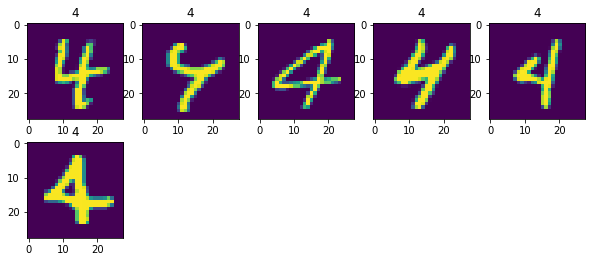

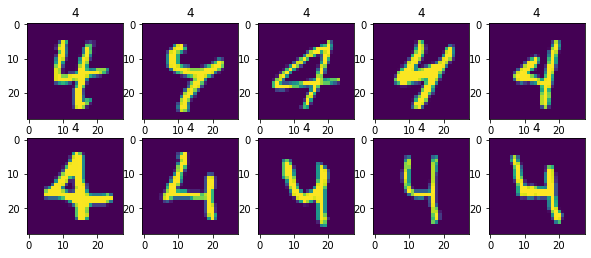

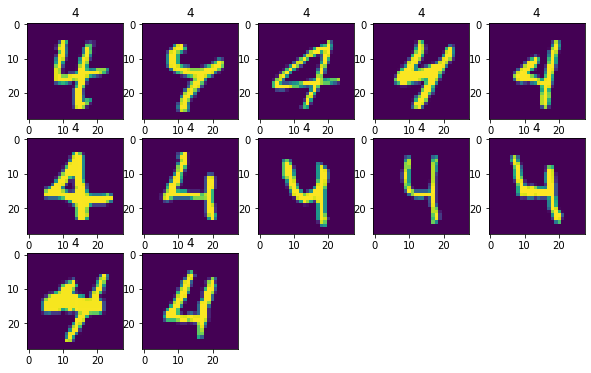

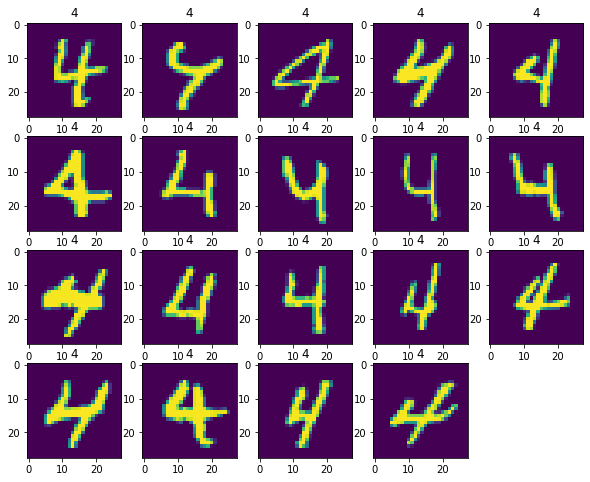

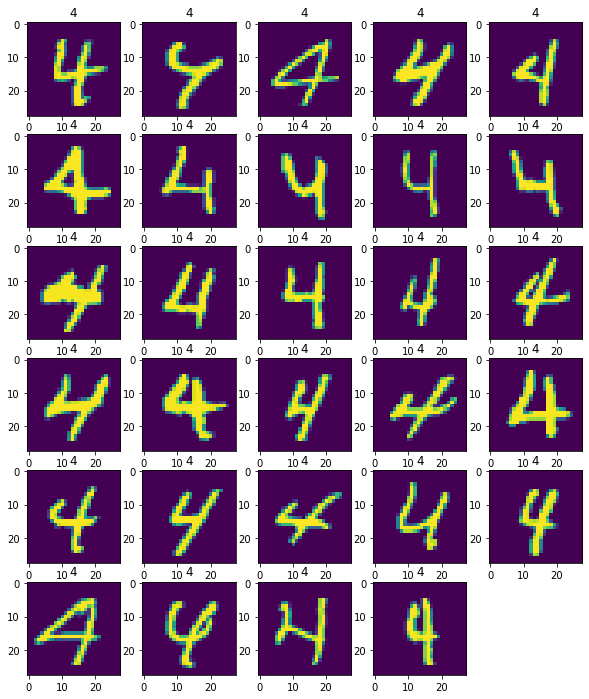

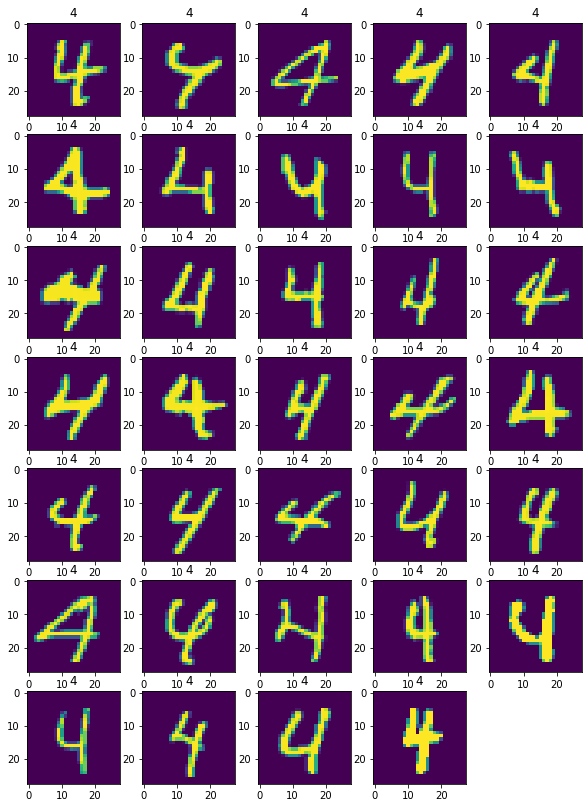

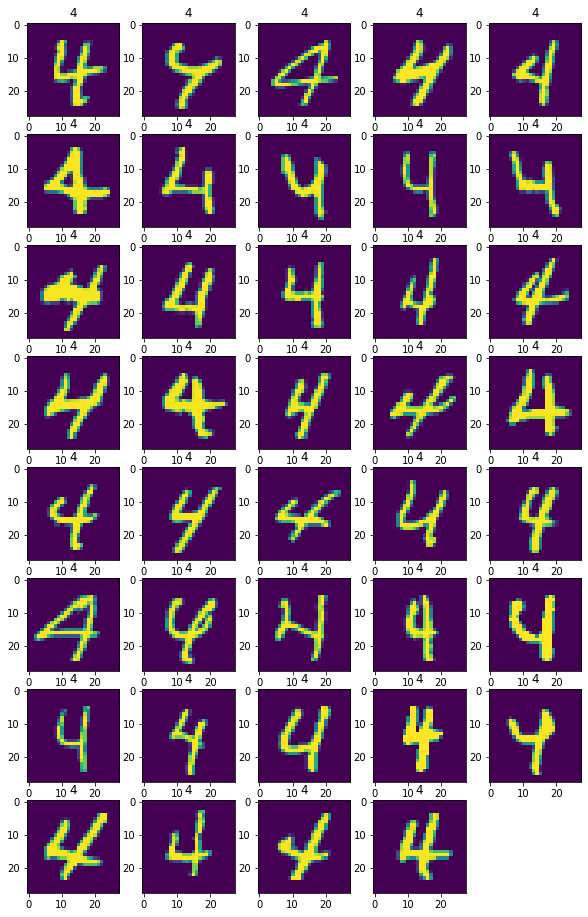

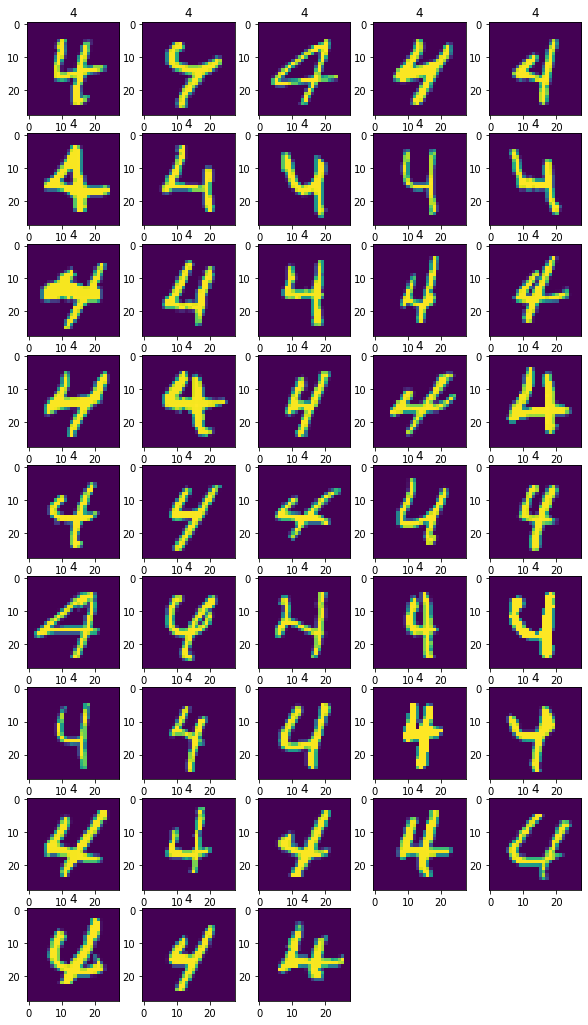

In [17]:
for epsilon in covers.keys():
    C=covers[epsilon]
    I=lm_indices[C]
    MN.plot_landmark(I,title=str(epsilon))


In [18]:
MN.plot_landmark(allV[label][1])

NameError: name 'allV' is not defined

### To do

1. Take a single character (say 2) partition according to identify of three closest landmarks, and scatter in triangle according to relative distances from these three landmarks.
2. Use scaling of epsilon cover as a function of epsilon to estimate the dimension for each digit.